# Adelaide University Union: Twitter Sentiment Analysis
  
### ... a basic demonstration of text analytics using social media data...

All tweets from ```@AdelUniUnion``` were scraped and their sentiment and subjectivity analysed using 'natural language processing' analytical techniques.
  
#### Richard Shanahan

## Adelaide University Union Twitter Account 

Here are a few metrics about the ```@AdelUniUnion``` Twitter handle. This information has been identified by analysing content on https://twitter.com/AdelUniUnion

Note: there are 31 users that have authored content displayed on https://twitter.com/AdelUniUnion

In [35]:
print('Number of tweets')
data.frame(nrow(auu))

print('Sentiment breakdown of tweets')
data.frame(table(auu$polarity))

print('Subjectivity breakdown of tweets')
data.frame(table(auu$subjectivity))

print('The Twitter user handles appearing on the AUU feed (includes retweets):')
data.frame(unique(auu$user))

[1] "Number of tweets"


,nrow.auu.
1,807


[1] "Sentiment breakdown of tweets"


,Var1,Freq
1,negative,52
2,neutral,662
3,positive,93


[1] "Subjectivity breakdown of tweets"


,Var1,Freq
1,objective,520
2,subjective,287


[1] "The Twitter user handles appearing on the AUU feed (includes retweets):"


,unique.auu.user.
1,@AdelUniUnion
2,@bbgum_princen
3,@UniofAdelaide
4,@ISCUoA
5,@adelaidesrc
6,@Ollie_English
7,@austudentradio
8,@jenniferetoile
9,@LeeLinChinSBS
10,@OnDitMagazine


## Adelaide University Union Twitter *Sentiment* and *Subjectivity* by **Likes**

The tables and graphics below display sentiment analysis output of tweets appearing on the ```@AdelUniUnion``` Twitter handle. Content authors are displayed ranked by the poularity of content, namely *likes*.

Note: content from 31 auhtors appears on ```@AdelUniUnion```, but only those deemed *popular*, that is, have *likes* are displayed below.

,user,source,like_fave,polarity,subjectivity
1,@beyondblue,twitter,515,neutral,subjective
2,@Simpsons_tweets,twitter,370,neutral,subjective
3,@ASOS,twitter,269,neutral,objective
4,@ManRepeller,twitter,37,neutral,objective
5,@UniofAdelaide,twitter,17,neutral,objective
6,@triplejmornings,twitter,15,positive,objective
7,@RehannaRazif,twitter,11,negative,objective
8,@UniofAdelaide,twitter,11,neutral,objective
9,@australian,twitter,10,negative,subjective
10,@UniofAdelaide,twitter,9,neutral,objective


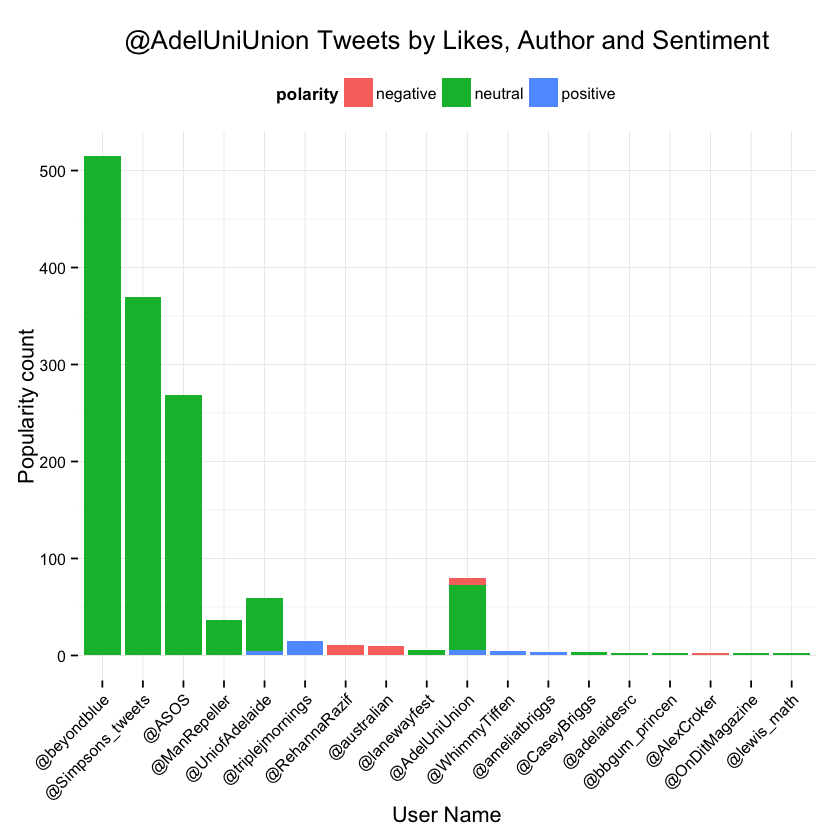

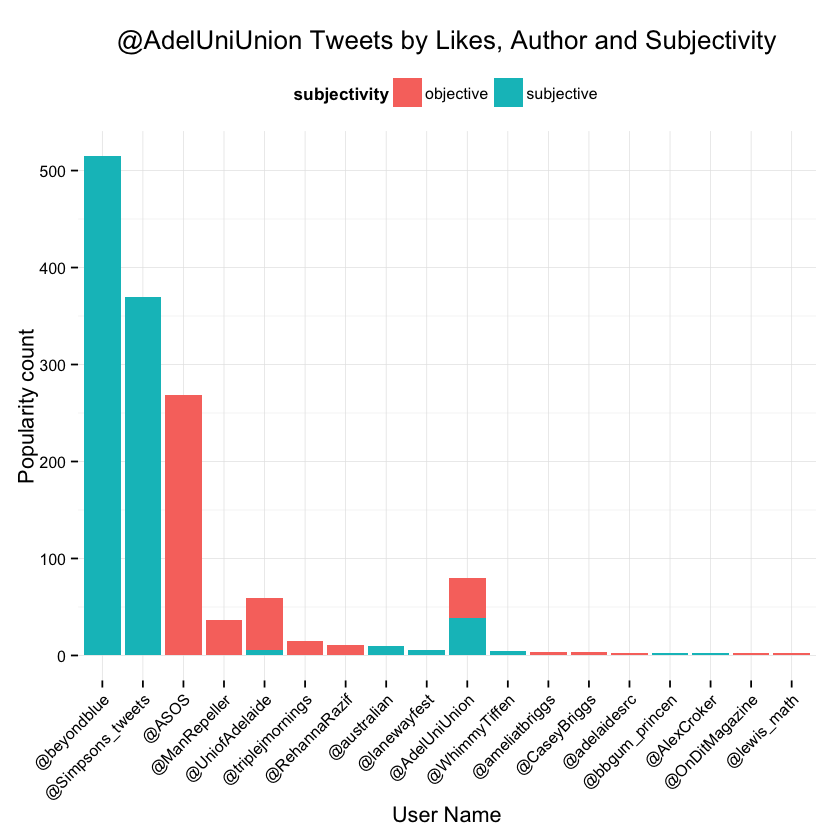

In [36]:
#load packages
library(ggplot2)
library(dplyr)

#set theme for ggplot2 graphics
theme = theme_set(theme_minimal())
theme = theme_update(legend.position="top")


sentiment_likefave_fb <-  auu %>%
  mutate(user = substr(user, 0, 30)) %>%       #this creates shorter version of username
  group_by(user, source, polarity, subjectivity) %>%
  mutate(posts = n()) %>%
  select(user, source, like_fave, polarity, subjectivity) %>%
  filter(!is.na(polarity) & source == 'twitter') %>%
  group_by(user, source, polarity, subjectivity, like_fave) %>%
  ungroup() %>%
  arrange(desc(like_fave, user))

head(sentiment_likefave_fb, 10)


ggplot(data = arrange(head(sentiment_likefave_fb, 50), desc(polarity)), 
       #ordered x axis by popularity count. For alpha order just include 'user' instead
       aes(x=factor(user, levels=(unique(head(sentiment_likefave_fb, 50)$user))),     
           y=like_fave,
           fill=polarity)) + 
  geom_bar(stat='identity') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        title = element_text(size = 13, colour = "black"),
        axis.title = element_text(size = 13, colour = "black")) +
  ggtitle("@AdelUniUnion Tweets by Likes, Author and Sentiment") +
  xlab("User Name") +
  ylab("Popularity count") 

ggplot(data = arrange(head(sentiment_likefave_fb, 50), desc(subjectivity)), 
       #ordered x axis by popularity count. For alpha order just include 'user' instead
       aes(x=factor(user, levels=(unique(head(sentiment_likefave_fb, 50)$user))),     
           y=like_fave,
           fill=subjectivity)) + 
  geom_bar(stat='identity') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        title = element_text(size = 13, colour = "black"),
        axis.title = element_text(size = 13, colour = "black")) +
  ggtitle("@AdelUniUnion Tweets by Likes, Author and Subjectivity") +
  xlab("User Name") +
  ylab("Popularity count") 

## Adelaide University Union Twitter *Sentiment* and *Subjectivity* by **Retweets**

The tables and graphics below display sentiment analysis output of tweets appearing on the ```@AdelUniUnion``` Twitter handle. Content authors are displayed ranked by the poularity of content, namely *retweets*.

Note: content from 31 auhtors appears on ```@AdelUniUnion```, but only those deemed *popular*, that is, have *retweets* are displayed below.

,user,source,share_rtwt,polarity,subjectivity
1,@Simpsons_tweets,twitter,299,neutral,subjective
2,@beyondblue,twitter,232,neutral,subjective
3,@ASOS,twitter,160,neutral,objective
4,@RehannaRazif,twitter,16,negative,objective
5,@UniofAdelaide,twitter,15,neutral,objective
6,@AdelUniUnion,twitter,12,neutral,objective
7,@australian,twitter,12,negative,subjective
8,@ManRepeller,twitter,11,neutral,objective
9,@UniofAdelaide,twitter,6,neutral,objective
10,@AdelUniUnion,twitter,5,negative,subjective


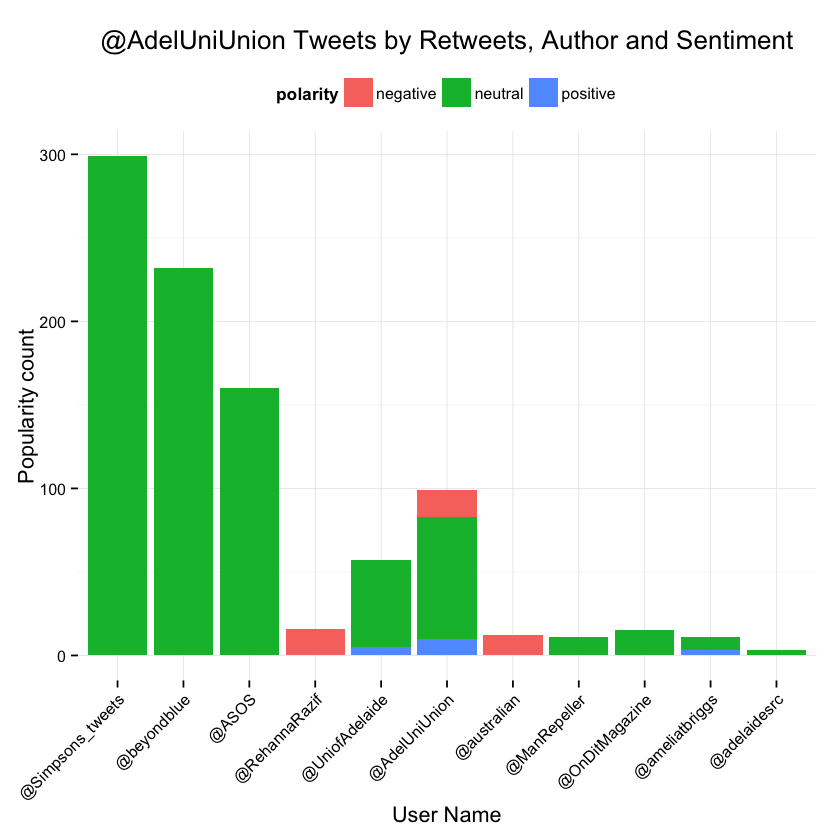

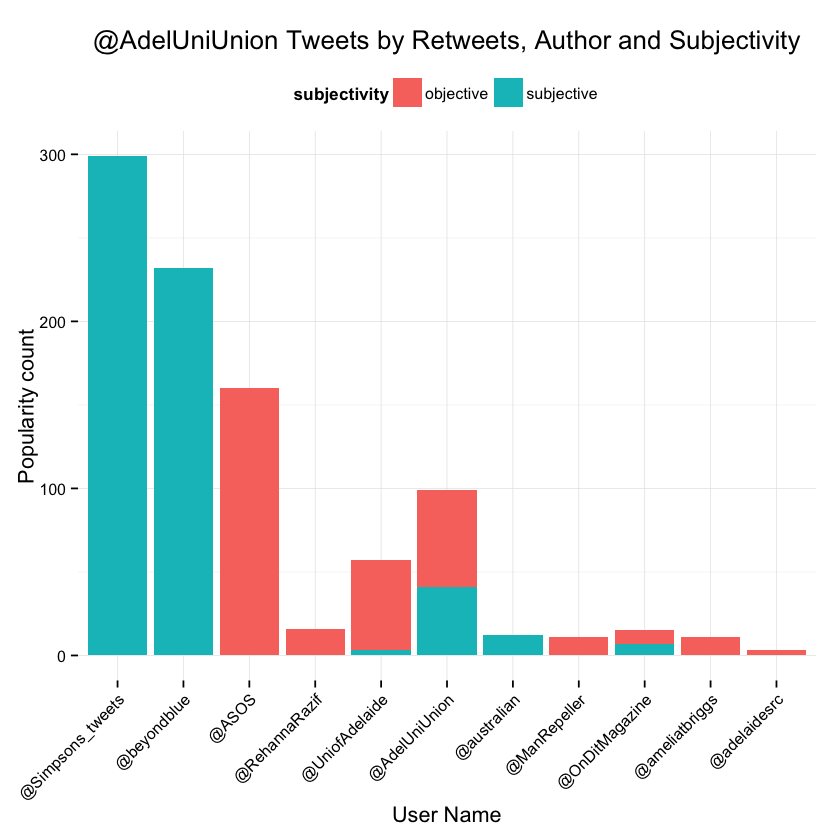

In [37]:

sentiment_likefave_fb <-  auu %>%
  mutate(user = substr(user, 0, 30)) %>%       #this creates shorter version of username
  group_by(user, source, polarity, subjectivity) %>%
  mutate(posts = n()) %>%
  select(user, source, share_rtwt, polarity, subjectivity) %>%
  filter(!is.na(polarity) & source == 'twitter') %>%
  group_by(user, source, polarity, subjectivity, share_rtwt) %>%
  ungroup() %>%
  arrange(desc(share_rtwt, user))

head(sentiment_likefave_fb, 10)


ggplot(data = arrange(head(sentiment_likefave_fb, 50), desc(polarity)), 
       #ordered x axis by popularity count. For alpha order just include 'user' instead
       aes(x=factor(user, levels=(unique(head(sentiment_likefave_fb, 50)$user))),     
           y=share_rtwt,
           fill=polarity)) + 
  geom_bar(stat='identity') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        title = element_text(size = 13, colour = "black"),
        axis.title = element_text(size = 13, colour = "black")) +
  ggtitle("@AdelUniUnion Tweets by Retweets, Author and Sentiment") +
  xlab("User Name") +
  ylab("Popularity count") 

ggplot(data = arrange(head(sentiment_likefave_fb, 50), desc(subjectivity)), 
       #ordered x axis by popularity count. For alpha order just include 'user' instead
       aes(x=factor(user, levels=(unique(head(sentiment_likefave_fb, 50)$user))),     
           y=share_rtwt,
           fill=subjectivity)) + 
  geom_bar(stat='identity') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        title = element_text(size = 13, colour = "black"),
        axis.title = element_text(size = 13, colour = "black")) +
  ggtitle("@AdelUniUnion Tweets by Retweets, Author and Subjectivity") +
  xlab("User Name") +
  ylab("Popularity count") 

## Adelaide University Union Twitter *Sentiment* and *Subjectivity* by **Posts**

The graphics below display sentiment analysis output of tweets appearing on the ```@AdelUniUnion``` Twitter handle. Content authors are displayed ranked by the number of tweets.


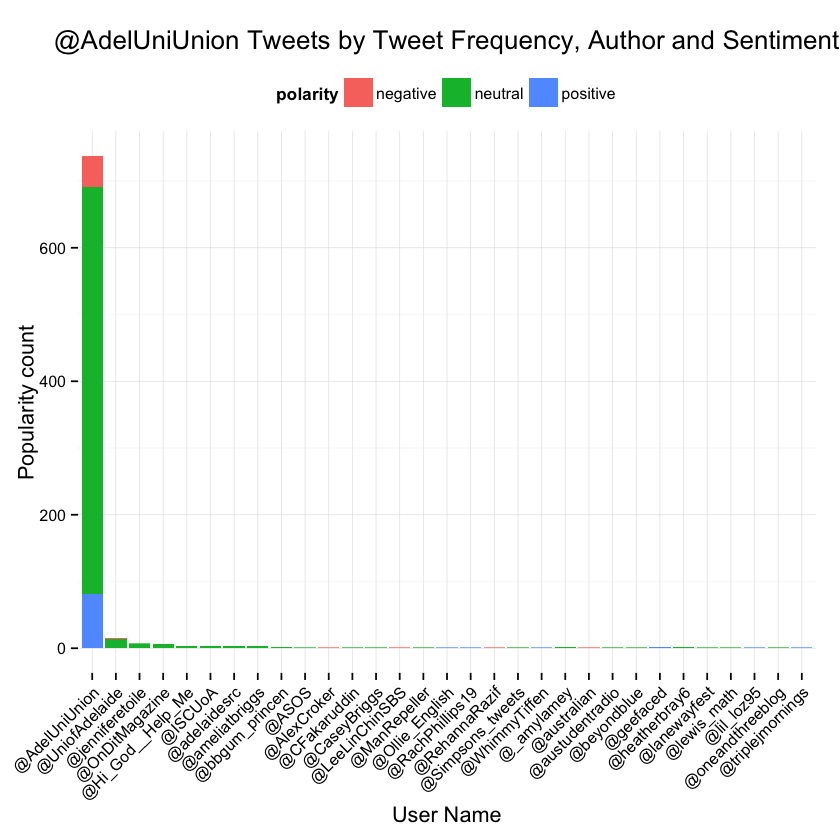

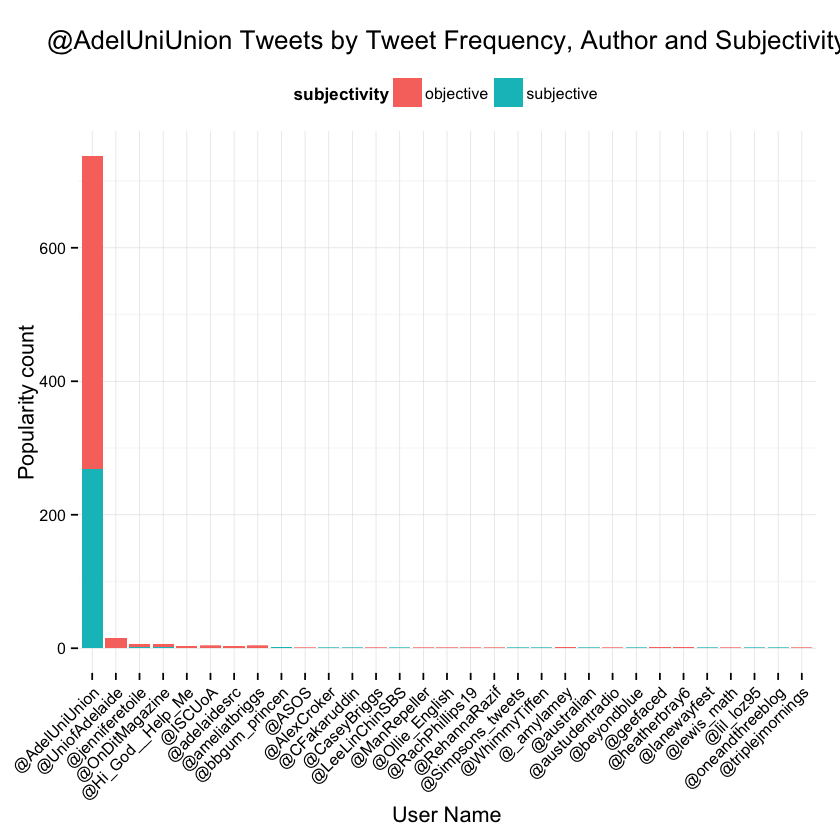

In [38]:
sentiment_likefave_fb <-  auu %>%
  mutate(user = substr(user, 0, 30)) %>%       #this creates shorter version of username
  group_by(user, source, polarity, subjectivity) %>%
  mutate(posts = n()) %>%
  select(user, source, like_fave, polarity, subjectivity, posts) %>%
  filter(!is.na(polarity) & source == 'twitter') %>%
  group_by(user, source, polarity, subjectivity, posts) %>%
  summarise(summariser = sum(posts)) %>%
  ungroup() %>%
  arrange(desc(posts, user))

#head(sentiment_likefave_fb, 20)


ggplot(data = arrange(head(sentiment_likefave_fb, 50), desc(polarity)), 
       #ordered x axis by popularity count. For alpha order just include 'user' instead
       aes(x=factor(user, levels=(unique(head(sentiment_likefave_fb, 50)$user))),     
           y=posts,
           fill=polarity)) + 
  geom_bar(stat='identity') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        title = element_text(size = 13, colour = "black"),
        axis.title = element_text(size = 13, colour = "black")) +
  ggtitle("@AdelUniUnion Tweets by Tweet Frequency, Author and Sentiment") +
  xlab("User Name") +
  ylab("Popularity count") 

ggplot(data = arrange(head(sentiment_likefave_fb, 50), desc(subjectivity)), 
       #ordered x axis by popularity count. For alpha order just include 'user' instead
       aes(x=factor(user, levels=(unique(head(sentiment_likefave_fb, 50)$user))),     
           y=posts,
           fill=subjectivity)) + 
  geom_bar(stat='identity') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        title = element_text(size = 13, colour = "black"),
        axis.title = element_text(size = 13, colour = "black")) +
  ggtitle("@AdelUniUnion Tweets by Tweet Frequency, Author and Subjectivity") +
  xlab("User Name") +
  ylab("Popularity count") 